# *120 years of Olympics* analysis

Important: Some of the plots need to be run twice to load in correct size

**Import modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

**Read CSV file**

In [2]:
df = pd.read_csv('./archive/athlete_events.csv')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Set global options for plots**

In [3]:
plt.style.use('fivethirtyeight')
font = {'size':10}
plt.rc('font', **font)

**Create dataframes that will be useful later**

In [4]:
male = df.loc[df['Sex'] == 'M'] # All males

In [5]:
female = df.loc[df['Sex'] == 'F'] # All females

In [6]:
all_medalists = df.loc[df['Medal'].notnull()]

***

# ***ANALYSIS***

## **1. What countries receive the most medals nowadays? Does it change much across the timespan?**

**TOP 5 - Countries that received the most medals since year 2000:**

In [7]:
top_recent_medalists_by_country = all_medalists.loc[all_medalists['Year'] >= 2000]
top_recent_medalists_by_country= top_recent_medalists_by_country['Team'].value_counts()
top_recent_countries = top_recent_medalists_by_country.index[0:5]

In [8]:
top_recent_medalists_by_country.head(5)

United States    1561
Russia            913
Germany           775
Australia         693
China             593
Name: Team, dtype: int64

**TOP 5 - Countries that received the most medals during the whole history of Olympics:**

In [9]:
top_medalists_by_country = all_medalists['Team'].value_counts()
top_countries = top_medalists_by_country.index[0:5]

In [10]:
top_medalists_by_country.head(5)

United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64

**For TOP 5 countries since year 2000, check their medal winning history**

In [11]:
top_recent_country_medals = all_medalists.loc[all_medalists['Team'].isin(top_recent_countries)]

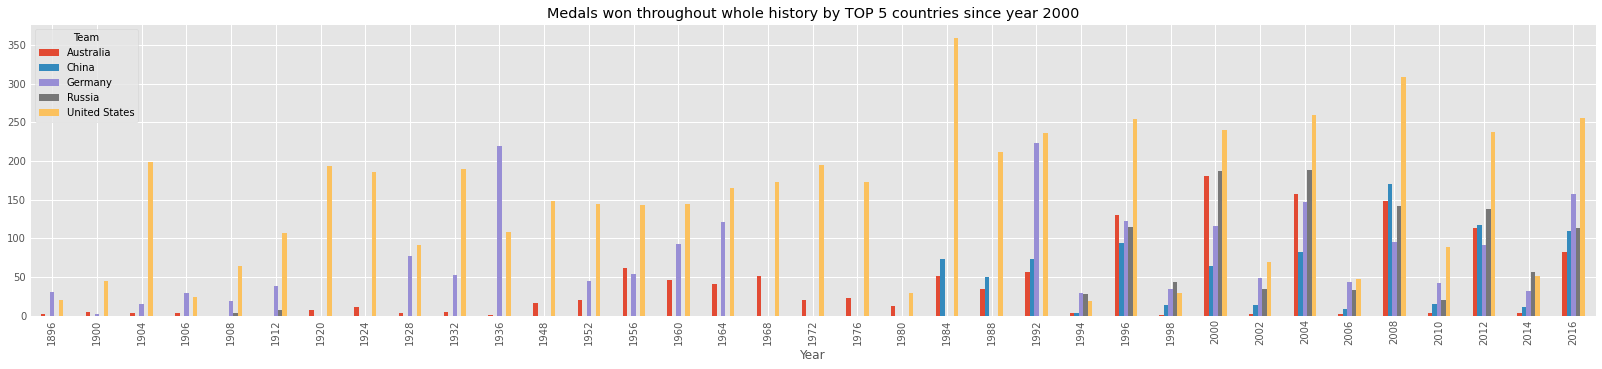

In [12]:
recent_countries_medals_groups = top_recent_country_medals.groupby('Team')['Year'].value_counts().sort_index()
plt.rcParams['figure.figsize'] = [25, 5]
plt.style.use('ggplot')
tick_spacing = 1
ax = recent_countries_medals_groups.unstack(0).plot.bar(width=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title('Medals won throughout whole history by TOP 5 countries since year 2000')
plt.show()

**For TOP 5 countries ever, check their medal winning history**

In [13]:
top_country_medals = all_medalists.loc[all_medalists['Team'].isin(top_countries)]

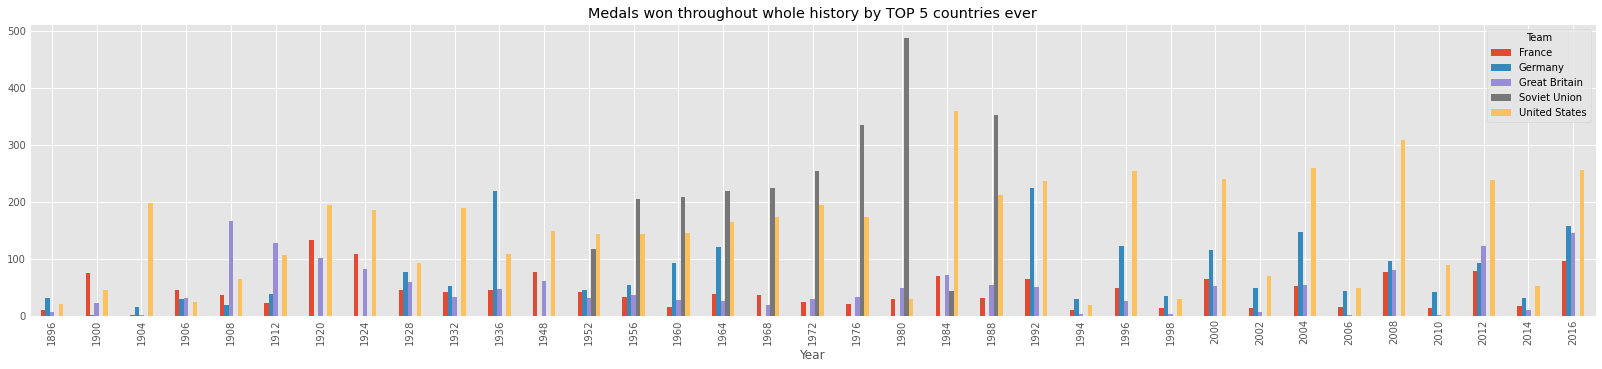

In [14]:
countries_medals_groups = top_country_medals.groupby('Team')['Year'].value_counts().sort_index()
plt.rcParams['figure.figsize'] = [25, 5]
plt.style.use('ggplot')
tick_spacing = 1
ax = countries_medals_groups.unstack(0).plot.bar(width=0.5)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.set_title('Medals won throughout whole history by TOP 5 countries ever')
plt.show()

Winter and summer seasons are grouped together until 1992!

#### ***Summary***

- The trend doesn't change much for USA, the winner of the most medals in the history as well as in last 20 years
- The amount of medals won by Russia seem like a reasonable continuation to the situation of Soviet Union before
- China didn't participate in Olympics until 1984, and since then they have won fairly big amount of medals

***

## **2. Who wins the most medals? Women or men?**

**All participants sex ratio**

First, let's see what is the sex ratio of all participants, winning medals or not

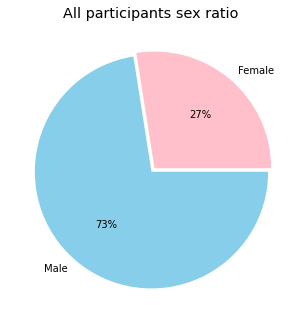

In [15]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.pie([female.size, male.size], labels=['Female','Male'], explode=(0.02, 0.02), autopct='%1.0f%%', colors=['pink','skyblue'])
plt.title('All participants sex ratio ')
plt.show()

In [16]:
male_medalists = male.loc[male['Medal'].notnull()] # All male medalists

In [17]:
female_medalists = female.loc[female['Medal'].notnull()] # All female medalists

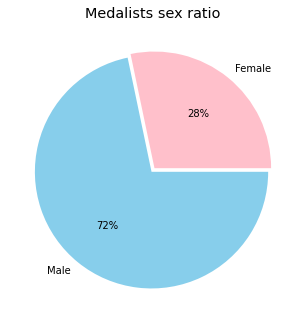

In [18]:
plt.pie([female_medalists['Medal'].size, male_medalists['Medal'].size], labels=['Female','Male'], explode=(0.02, 0.02), autopct='%1.0f%%', colors=['pink','skyblue'])
plt.rcParams['figure.figsize'] = [5, 5]
plt.title('Medalists sex ratio')
plt.show()

In [19]:
male_medalists_recent = male_medalists.loc[male_medalists['Year'] >= 2000]

In [20]:
female_medalists_recent = female_medalists.loc[female_medalists['Year'] >= 2000]

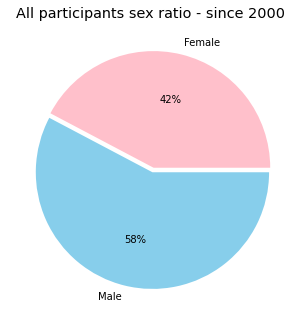

In [21]:
plt.pie([female.loc[female['Year'] >= 2000].size, male.loc[male['Year'] >= 2000].size], labels=['Female','Male'], explode=(0.02, 0.02), autopct='%1.0f%%', colors=['pink','skyblue'])
plt.rcParams['figure.figsize'] = [5, 5]
plt.title('All participants sex ratio - since 2000 ')
plt.show()

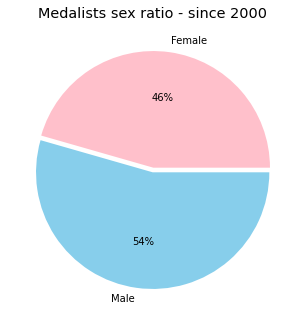

In [22]:
plt.pie([female_medalists_recent['Medal'].size, male_medalists_recent['Medal'].size], labels=['Female','Male'], explode=(0.02, 0.02), autopct='%1.0f%%', colors=['pink','skyblue'])
plt.rcParams['figure.figsize'] = [5, 5]
plt.title('Medalists sex ratio - since 2000')
plt.show()

#### ***Summary***

- Males win more medals
- But it's probably because there are more male participants
- The percentage of medals won by sex is almost identical to percentage of participants of that sex
- A plot comparing male:female ratio of participants with male medalists:female medalists across the timespan would be useful

***

## **3. What’s the trend for the number of participants?**

For this question the data for Summer and Winter seasons is show separately, as the number of participants in both of them differs significantly.

**Summer:**

In [23]:
summer = df.loc[df['Season'] == 'Summer']

In [24]:
summer_years = np.sort(pd.unique(summer['Year']))

In [25]:
par_by_year_summer = summer['Year'].value_counts().sort_index()

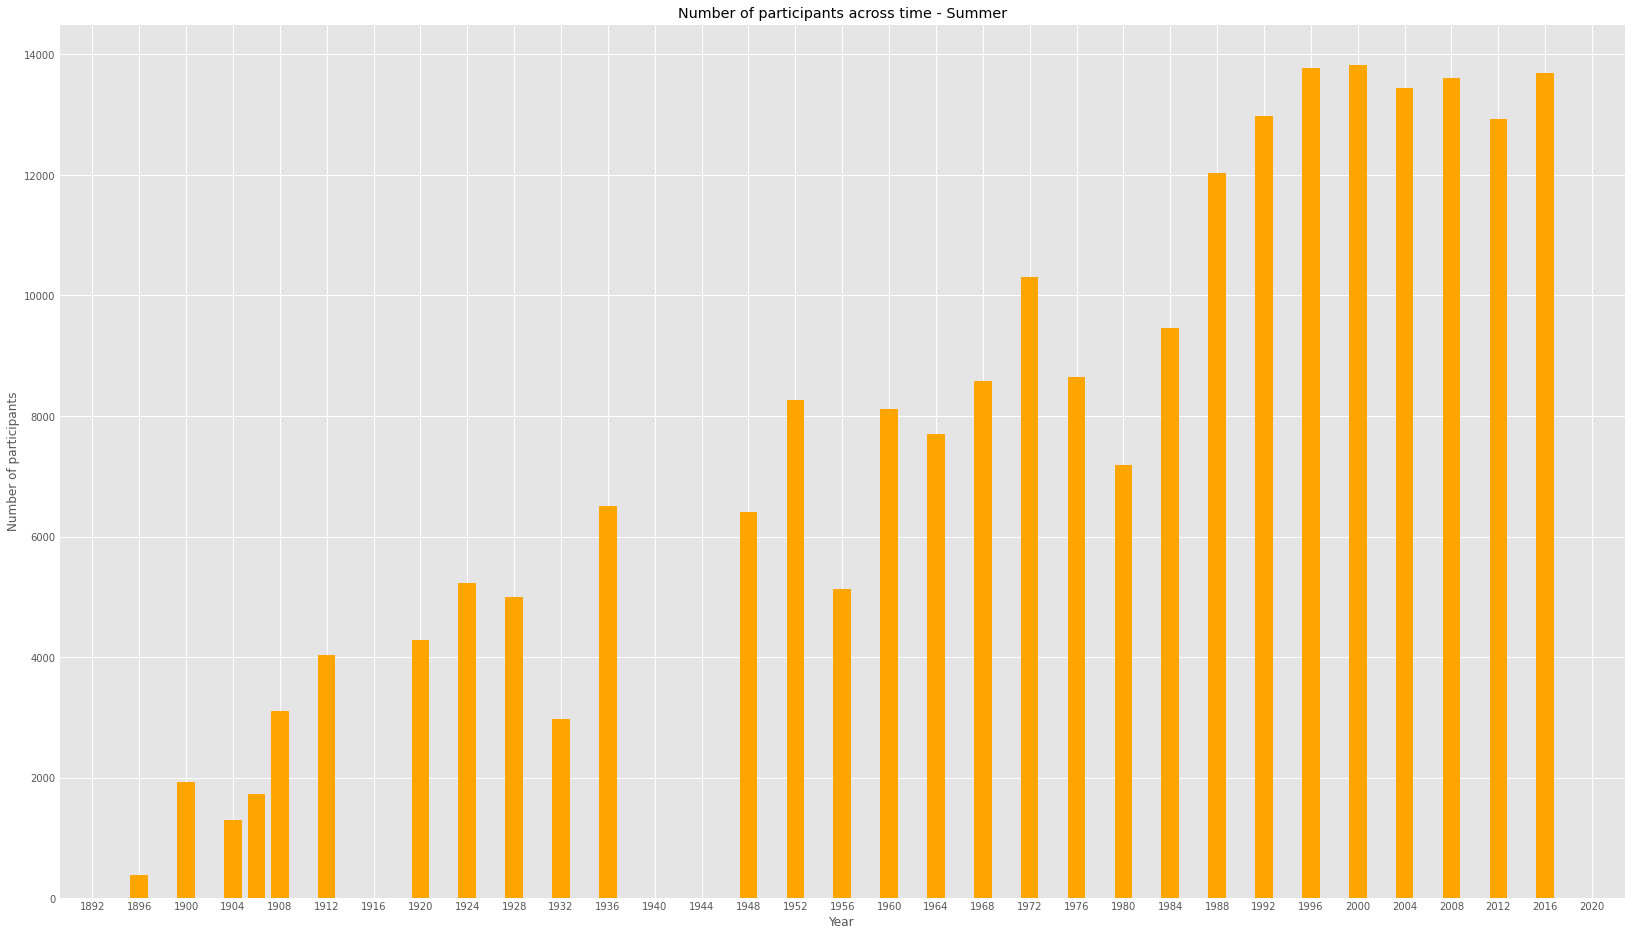

In [53]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)
plt.bar(summer_years, par_by_year_summer, width=1.5, color='orange')
plt.rcParams['figure.figsize'] = [25, 5]
plt.xlabel('Year')
plt.ylabel('Number of participants')
ax.set_title("Number of participants across time - Summer")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))


plt.show()

**Winter:**

In [27]:
winter = df.loc[df['Season'] == 'Winter']

In [28]:
winter_years = np.sort(pd.unique(winter['Year']))

In [29]:
par_by_year_winter = winter['Year'].value_counts().sort_index()

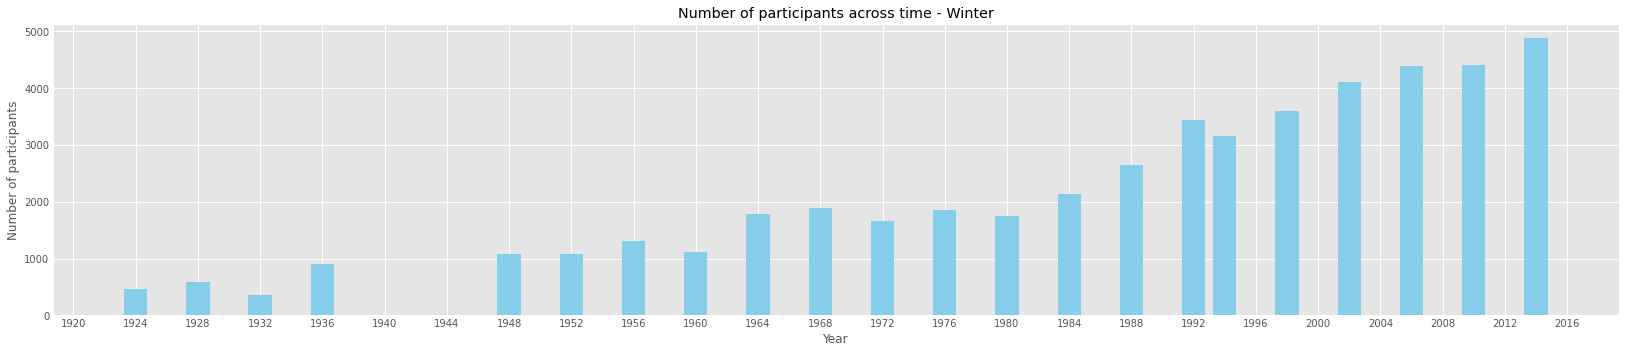

In [30]:
tick_spacing = 4
fig, ax = plt.subplots(1,1)

plt.bar(winter_years, par_by_year_winter, width=1.5, color='skyblue')
plt.rcParams['figure.figsize'] = [25, 5]
plt.xlabel('Year')
plt.ylabel('Number of participants')
ax.set_title("Number of participants across time - Winter")
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show()

#### ***Summary***

- The number of participants has been increasing in both winter and summer seasons of Olympics, despite minor decreases. 
- In case of summer season this number has been stable since 1988 and varies in range of 1200 - 1400 participants.

***

## **4. What is the relation between age and medals won?**

**Clean data**

Drop rows containting NaN in Age column; replace values in "Medal" column with "Yes" or "No"

In [31]:
age_medals = df[['Age','Medal']]
age_medals = age_medals.dropna(subset = ["Age"]) # Drop rows containing NaN in Age column
age_medals = age_medals.fillna('No')
age_medals = age_medals.replace(dict.fromkeys(['Bronze','Silver','Gold'], 'Yes'))

Group "Age" and new "Medal" columns

In [32]:
age_medals_compare = age_medals.groupby(['Age','Medal']).size().unstack(fill_value=0)
age_medals_compare.head(5)

Medal,No,Yes
Age,,
10.0,0,1
11.0,12,1
12.0,33,6
13.0,171,16
14.0,762,75


Show bar plot with medalists by age for all participants throughout whole history of Olympics

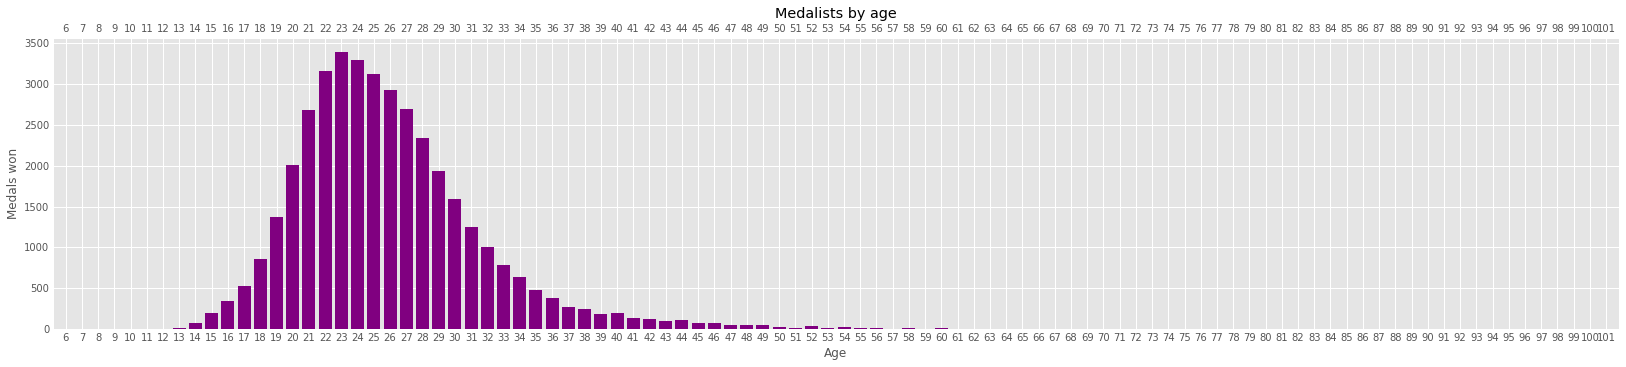

In [33]:
fig, ax = plt.subplots(1,1)
plt.bar(age_medals_compare.index, age_medals_compare['Yes'], color='purple')
plt.rcParams['figure.figsize'] = [30, 10]
tick_spacing = 1
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(labelbottom=True,labeltop=True)
plt.title('Medalists by age')
plt.xlabel('Age')
plt.ylabel('Medals won')
#plt.legend()
plt.show()

#### ***Summary***

- Most medals are won by participants between 22 and 25 years old. 
- 23 year old participants win the most medals.
- The bigger age difference from 23 yrs old, the less medals won.

***

## **5. Do tall people win more medals?**

- For questions 5 and 6 we need to define what "short" and "tall" mean.
- Males and females are shown separately, as their heights differ significantly.
- Heights over 75 percentile will be considered as **tall**.

**Males:**

In [34]:
male['Height'].describe()['75%']

185.0

In [35]:
male_tall_var = 185
# male_tall_medalists = male_medalists.loc[male_medalists['Height'] >= male_tall_var]
# print(f'Medalists higher or equal to 185cm: {male_tall_medalists.shape[0]}')
# male_not_tall_medalists = male_medalists.loc[male_medalists['Height'] < male_tall_var]
# print(f'Medalists below 185cm: {male_not_tall_medalists.shape[0]}')


In [36]:
male_height_medals = male[['Height','Medal']]
male_height_medals = male_height_medals.dropna(subset = ["Height"]) # Drop rows containing NaN in Height column
male_height_medals = male_height_medals.fillna('No')
male_height_medals = male_height_medals.replace(dict.fromkeys(['Bronze','Silver','Gold'], 'Yes'))

In [37]:
male_medals_compare = male_height_medals.groupby(['Height','Medal']).size().unstack(fill_value=0)
male_medals_compare.head(5)

Medal,No,Yes
Height,,
127.0,1,0
128.0,1,0
130.0,2,0
132.0,3,0
133.0,1,0


In [38]:
# fig, ax = plt.subplots(1,1)
# tick_spacing = 2
# ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# ax.tick_params(labelbottom=True,labeltop=True)

# #plt.plot(male_medals_compare.index, male_medals_compare['No'])
# plt.plot(male_medals_compare.index, male_medals_compare['Yes'], label='Medalists', color='skyblue')
# plt.rcParams['figure.figsize'] = [20, 15]

# plt.title('Male medalists by height')
# plt.xlabel('Height')
# plt.ylabel('Medals won')
# plt.axvline(x=185, color='green', label='75% height for males', ls='--', lw=1)
# plt.legend()
# plt.show()

**Females:**

In [39]:
female['Height'].describe()['75%']

173.0

In [40]:
female_tall_var = 173

In [41]:
female_height_medals = female[['Height','Medal']]
female_height_medals = female_height_medals.dropna(subset = ["Height"]) # Drop rows containing Nan in Height column
female_height_medals = female_height_medals.fillna('No')
female_height_medals = female_height_medals.replace(dict.fromkeys(['Bronze','Silver','Gold'], 'Yes'))

In [42]:
female_medals_compare = female_height_medals.groupby(['Height','Medal']).size().unstack(fill_value=0)
female_medals_compare.head(5)

Medal,No,Yes
Height,,
127.0,6,0
131.0,2,0
132.0,6,0
133.0,5,0
135.0,12,0


**Males and females height vs medals won**

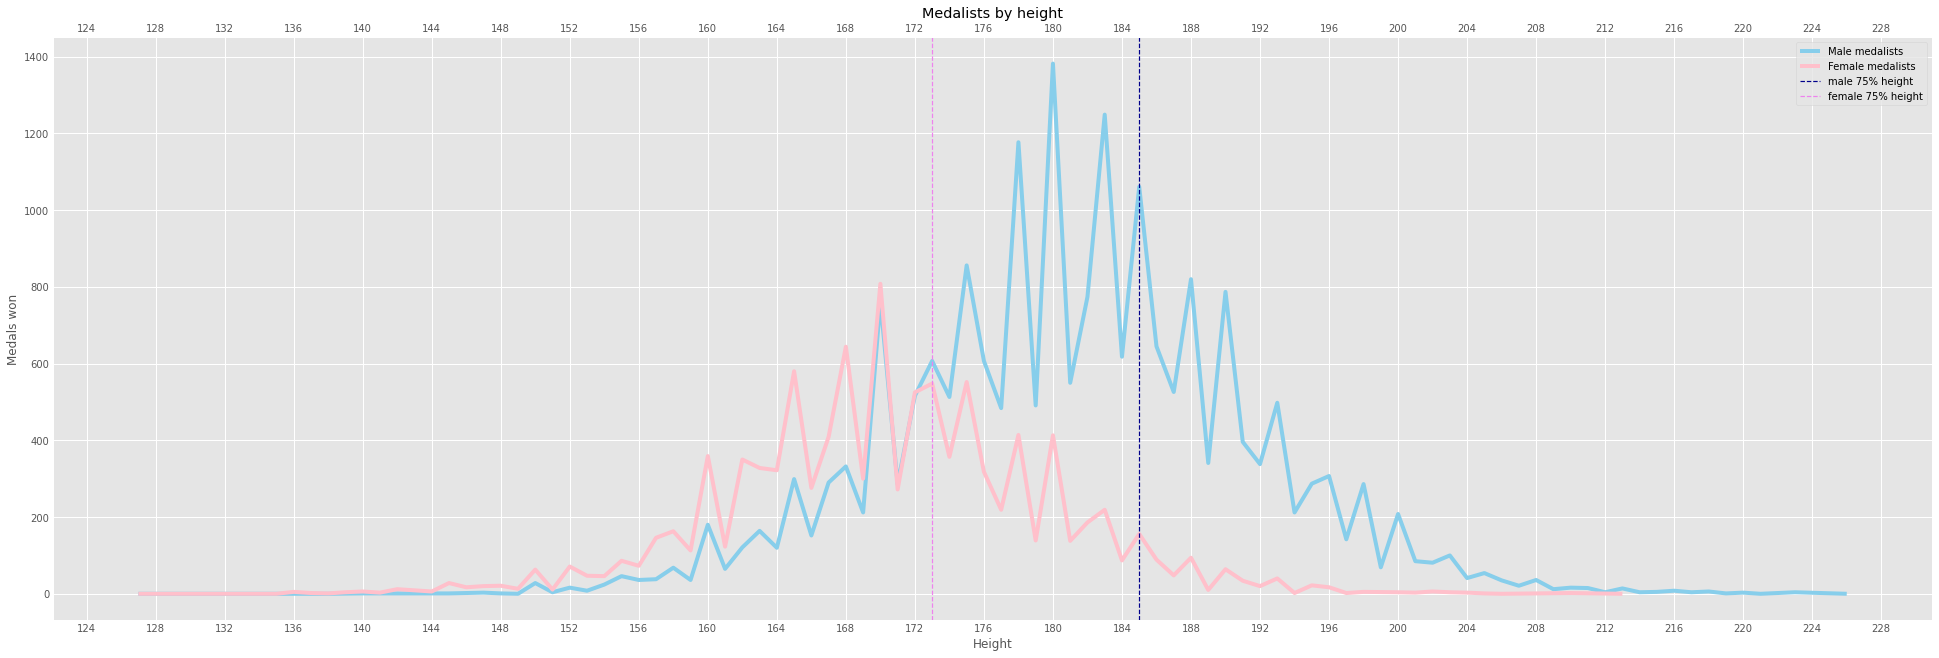

In [43]:
fig, ax = plt.subplots(1,1)
tick_spacing = 4
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(labelbottom=True,labeltop=True)

plt.plot(male_medals_compare.index, male_medals_compare['Yes'], label='Male medalists', color='skyblue') #MALES 
#plt.plot(female_medals_compare.index, female_medals_compare['No']+female_medals_compare['Yes'])
plt.plot(female_medals_compare.index, female_medals_compare['Yes'], label='Female medalists', color='pink')
plt.rcParams['figure.figsize'] = [25, 15]

plt.title('Medalists by height')
plt.xlabel('Height')
plt.ylabel('Medals won')
plt.axvline(x=male_tall_var, color='darkblue', label='male 75% height', ls='--', lw=1.2)
plt.axvline(x=female_tall_var, color='violet', label='female 75% height', ls='--', lw=1.2)
plt.legend()
plt.show()

#### ***Summary***

- More medals are won by males and females whose height is below 75 percentile

***

### **6. Which sports are dominated by short people? (You must define "short")**

- As above, data for males and females is separated
- Heights below 25 percentile will be considered as **short**.

**Males**

In [44]:
male_tall_var = male['Height'].describe()['25%']
male_tall_var

172.0

In [45]:
pd.options.mode.chained_assignment = None
male['h'] = male.apply(lambda row: 'short' if row['Height'] < male_tall_var else "not_short", axis=1)

In [46]:
male_sport_height = male.groupby(['Sport', 'h']).size().unstack(fill_value=0)
male_sport_height.loc[male_sport_height['short'] > male_sport_height['not_short']]

h,not_short,short
Sport,,
Trampolining,34,42


**Females**

In [47]:
female_tall_var = female['Height'].describe()['25%']
female_tall_var

162.0

In [48]:
pd.options.mode.chained_assignment = None
female['h'] = female.apply(lambda row: 'short' if row['Height'] < female_tall_var else "not_short", axis=1)

In [49]:
female_sport_height = female.groupby(['Sport', 'h']).size().unstack(fill_value=0)
female_sport_height.loc[female_sport_height['short'] > female_sport_height['not_short']]

h,not_short,short
Sport,,
Gymnastics,3292,5837
Weightlifting,210,253


#### ***Summary***

- With 25 height percentile set as "short" boundary there are only three sports in which there are more short participants
- For males only **Trampolining** is such a sport
- For females these are **Gymnastics** and **Weightlifting**

- It would be worth checking the same data with different "short" definition

### **7. Which families (same surname) win the most medals?**

In [50]:
def find_surname(name):
    if '(' in name:
        p = re.compile('(\w+)(?=\s[(])')
        if len(p.findall(name)) == 1:
            return p.findall(name)[0]
        else:
            return p.findall(name)[1:][0]
    else:
        p = re.compile('\s(\w+)$')
        return p.findall(name)[0]

In [51]:
print(find_surname('Galina Ivanovna Zybina (-Fyodorova)'))
print(find_surname('Jan (Johann-) Zybert (Siebert-)'))
print(find_surname('Vladislavas Zybaila'))
print(find_surname('Sabine Beate Zwiener (-Jauchstetter) 	'))

Zybina
Zybert
Zybaila
Zwiener


In [56]:
family_df = df[['ID', 'Name', 'Sport']]
family_df.head()

,ID,Name,Sport
0,1,A Dijiang,Basketball
1,2,A Lamusi,Judo
2,3,Gunnar Nielsen Aaby,Football
3,4,Edgar Lindenau Aabye,Tug-Of-War
4,5,Christine Jacoba Aaftink,Speed Skating


#### ***Summary***

- Task not finished

***

## **General remarks**

- Majority of above answers is ambiguous. More detailed analysis is required, including more precise questions or better specified assumptions. 